In [2]:
import os

# Load the secrets file
current_file_path = os.path.abspath("based.ipynb")
# print(f"current file: {current_file_path}")

# Get the parent directory of the current file's directory
parent_directory = os.path.dirname(current_file_path)
# print(f"parent file: {parent_directory}")

# Get the parent directory of the parent directory
Child_DIR = os.path.dirname(parent_directory)
# print(f"child file: {Child_DIR}")

# Define the path to the client_secret.json file
microsoft_annual_report_2023 = os.path.join(Child_DIR, '2023_Annual_Report.pdf')
print(f"client file: {microsoft_annual_report_2023}")

client file: d:\Dell\Documents\code\langchain\RAG\chromadb\2023_Annual_Report.pdf


In [3]:
from pypdf import PdfReader

reader = PdfReader(microsoft_annual_report_2023)
pdf_texts = [p.extract_text().strip() for p in reader.pages]

# Filter the empty strings
pdf_texts = [text for text in pdf_texts if text]

print(pdf_texts[0])


1 Dear shareholders, colleagues, customers, and partners,  
We are living through a time of historic challenge and opportunity. As I write this, the world faces ongoing economic, social , 
and geopolitical volatility. At the same time, we have entered a new age of AI that will fundamentally transform productivity  
for every individual, organization, and industry on earth, and help us address some of our most pressing challenges.  
This next generation of AI will reshape every software category and every business, including our own. Forty -eight years 
after its founding, Microsoft remains a consequential company because time and time again —from PC/Server, to 
Web/Internet, to Cloud/Mob ile—we have adapted to technological paradigm shifts. Today, we are doing so once again, as 
we lead this new era.  
Amid this transformation, our mission to empower every person and every organization on the planet to achieve 
more  remains constant. As a company, we believe we can be the democratizin

In [4]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, SentenceTransformersTokenTextSplitter

character_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", ". ", " ", ""],
    chunk_size=1000,
    chunk_overlap=0
)
character_split_texts = character_splitter.split_text('\n\n'.join(pdf_texts))

print(character_split_texts[10])
print(f"\nTotal chunks: {len(character_split_texts)}")

import chromadb.utils.embedding_functions as embedding_functions
# from langchain_openai import OpenAIEmbeddings
import chromadb

OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")

openai_ef = embedding_functions.OpenAIEmbeddingFunction(
                api_key=OPENAI_API_KEY,
                model_name="text-embedding-3-small"
            )

chroma_client = chromadb.Client()
chroma_collection = chroma_client.create_collection("2023_annual_reports", embedding_function=openai_ef)

ids = [str(i) for i in range(len(character_split_texts))]

chroma_collection.add(ids=ids, documents=character_split_texts)
print(chroma_collection.count())


3 Industry  
Across industries, we are rapidly becoming the partner of choice for any organization looking to generate real value from 
AI. In healthcare, for example, we introduced the world’s first fully automated clinical documentation application, DAX 
Copilot. The a pplication helps physicians reduce documentation time by half, freeing them to spend more time face to face 
with patients. And Epic will integrate it directly into its electronic health records system.  
And, in retail, we introduced new tools to help companies manage their day -to-day operations and digitize their physical 
stores.  
Modern work  
We are rapidly evolving Microsoft 365 into an AI -first platform that enables every individual to amplify their creativity and 
productivity, with both our established applications like Office and Teams, as well as new apps like Designer, Stream, and 
Loop. M icrosoft 365 is designed for today’s digitally connected, distributed workforce.

Total chunks: 344
344


In [5]:
chroma_collection = chroma_client.get_collection(name="2023_annual_reports", embedding_function=openai_ef)

chroma_collection.count()

344

In [6]:
import umap
import numpy as np
from tqdm import tqdm

embeddings = chroma_collection.get(include=['embeddings'])['embeddings']
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)

c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [9]:
def project_embeddings(embeddings, umap_transform):
    umap_embeddings = np.empty((len(embeddings),2))
    for i, embedding in enumerate(tqdm(embeddings)): 
        umap_embeddings[i] = umap_transform.transform([embedding])
    return umap_embeddings 

  0%|          | 0/344 [00:00<?, ?it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
  0%|          | 1/344 [00:15<1:29:24, 15.64s/it]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: Futur

(np.float64(-1.3102337390184402),
 np.float64(8.956755486130714),
 np.float64(4.046587324142456),
 np.float64(9.837772989273072))

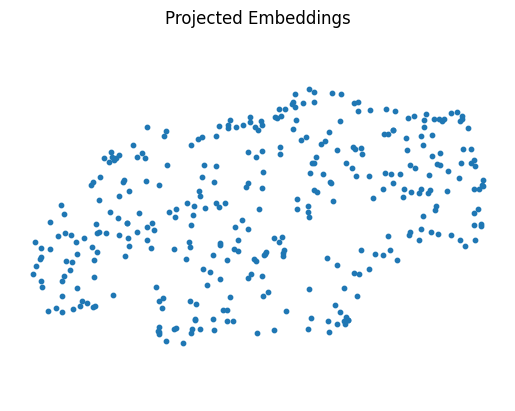

In [10]:
projected_dataset_embeddings = project_embeddings(embeddings, umap_transform)

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Projected Embeddings')
plt.axis('off')

## Relevancy and Distraction

In [12]:
query = "What is the total revenue?"

results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

and expenses are translated at average rates of exchange prevailing during the year. Translation adjustments resulting 
from this pr ocess are recorded to other comprehensive income.  
Revenue  
Product Revenue and Service and Other Revenue  
Product revenue includes sales from operating systems, cross -device productivity and collaboration applications, server 
applications, business solution applications, desktop and server management tools, software development tools, video 
games, and hardware  such as PCs, tablets, gaming and entertainment consoles, other intelligent devices, and related 
accessories.  
  
Service and other revenue includes sales from cloud -based solutions that provide customers with software, services, 
platforms, and content such as Office 365, Azure, Dynamics 365, and Xbox; solution support; and consulting services. 
Service and other reven ue also includes sales from online advertising and LinkedIn.

48 Revenue Recognition  
Revenue is recognized upon transfe

In [13]:
query_embedding = openai_ef([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'for

(np.float64(-1.3102337390184402),
 np.float64(8.956755486130714),
 np.float64(4.046587324142456),
 np.float64(9.837772989273072))

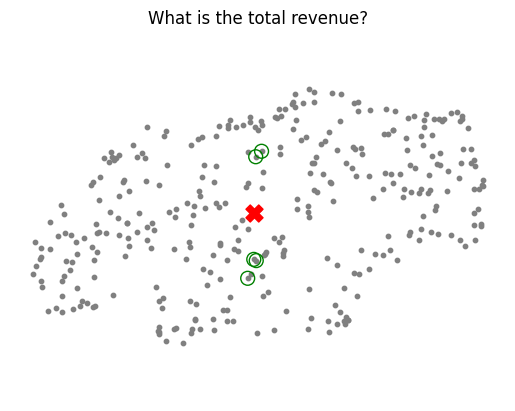

In [14]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

In [22]:
query = "What is the strategy around artificial intelligence (AI) ?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

2 As a company, any time we approach a transition like this, we do so responsibly. We believe AI should be as empowering 
across communities as it is powerful, and we’re committed to ensuring it is responsibly built and designed, with safety in 
mind from the outset.  
OUR OPPORTUNITY  
Every customer solution area and every layer of our tech stack will be reimagined for the AI era. And that’s exactly what 
we’ve already begun to do:  
Infrastructure  
Four years ago, we first invested in our AI supercomputer, with a goal of building the best cloud for training and inference.  
Today, it’s being used by our partner OpenAI to power its best -in-class foundation models and services, including one of 
the faste st-growing consumer apps ever —ChatGPT. NVIDIA, as well as leading AI startups like Adept and Inflection, is also 
using our infrastructure to build its own breakthrough models.

of AI, while simplifying security and management. Those leveraging the Microsoft Cloud are best positio

In [23]:
query_embedding = openai_ef([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'for

(np.float64(-1.3102337390184402),
 np.float64(8.956755486130714),
 np.float64(4.046587324142456),
 np.float64(9.837772989273072))

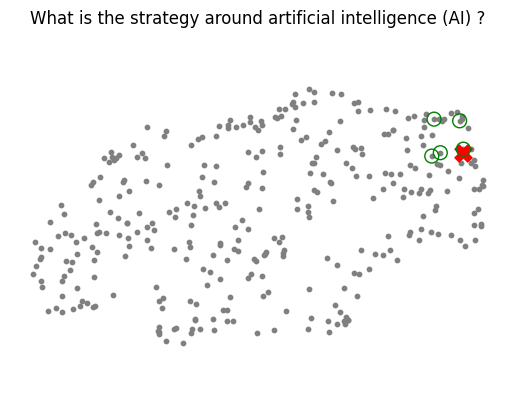

In [24]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

In [25]:
query = "What has been the investment in research and development?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

Research and development expenses include payroll, employee benefits, stock -based compensation expense, and other 
headcount -related expenses associated with product development. Research and development expenses also include third -
party development and pro gramming costs and the amortization of purchased software code and services content. Such 
costs related to software development are included in research and development expense until the point that technological 
feasibility is reached, which for our softwa re products, is generally shortly before the products are released to production. 
Once technological feasibility is reached, such costs are capitalized and amortized to cost of revenue over the estimated 
lives of the products.

32 Revenue, gross margin, and operating income included an unfavorable foreign currency impact of 3%, 4%, and 6%, 
respectively. Operating expenses included a favorable foreign currency impact of 2%.  
  
OPERATING EXPENSES  
Research and Developmen

In [26]:
query_embedding = openai_ef([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
 20%|██        | 1/5 [00:00<00:00,  4.81it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
 40%|████      | 2/5 [00:00<00:00,  5.90it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-servi

(np.float64(-1.3102337390184402),
 np.float64(8.956755486130714),
 np.float64(4.046587324142456),
 np.float64(9.837772989273072))

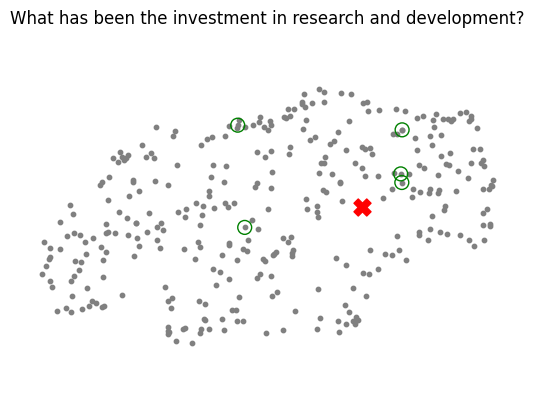

In [27]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

In [29]:
query = "What is the turn over of Mitchel Starc's Company?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

2022, as the value of future U.S. tax deductions exceeded the current tax liability from the U.S. global intangible low -taxed 
income (“GILTI”) tax.  
We have historically paid India withholding taxes on software sales through distributor withholding and tax audit 
assessments in India. In March 2021, the India Supreme Court ruled favorably in the case of Engineering Analysis Centre 
of Excellence Private Limited vs The Commissioner of Income Tax for companies in 86 separate appeals, some dating back 
to 2012, holding that software sales are not subject to India withholding taxes. Although we were not a party to the appeals,  
our software sales in India were determined to be not subject to withholding taxes. Therefore, we recorded a net income 
tax benefit of $620  million in the third quarter of fiscal year 2021 to reflect the results of the India Supreme Court decision 
impacting fiscal year  1996  through fiscal  year 2016.

70 On September  14, 2021, our Board of Directors approv

In [30]:
query_embedding = openai_ef([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'for

(np.float64(-1.3102337390184402),
 np.float64(8.956755486130714),
 np.float64(4.046587324142456),
 np.float64(9.837772989273072))

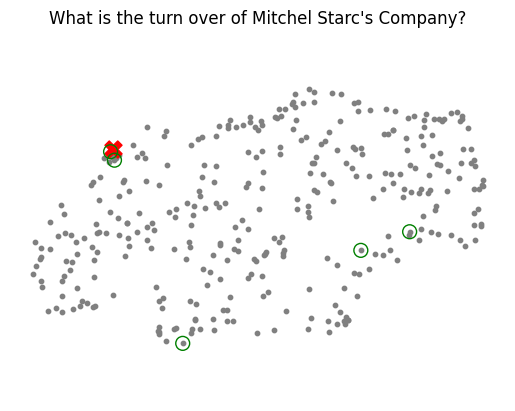

In [31]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')